Import liberaries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("IPL Matches 2008-2020.csv")

In [ ]:
df.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

*Q 1. What was the count of matches played in each season?*

Ans: In this dataset we have the date of each match. So I first converted the column "date" to datetime and then grouped the year using the below codes.

Maximum matches were played in the year of 2013.

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['year']=df['date'].dt.year

to find the matches played in each season, I grouped the years using the below code.

In [ ]:
matches_played = df.groupby('year').size()
print(matches_played)

year
2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
2020    60
dtype: int64


to visulaize the results, I ploted bar chart

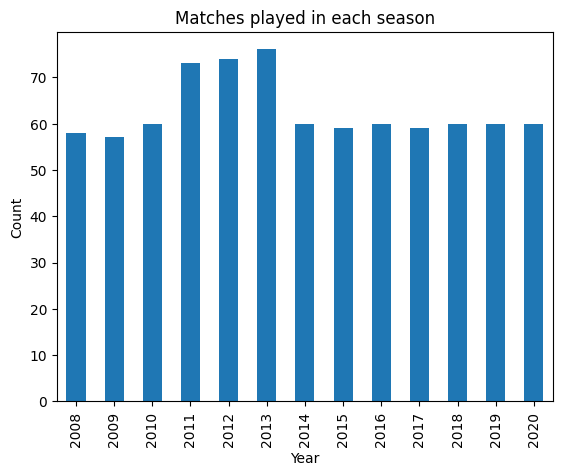

In [ ]:
matches_played.plot(kind='bar')
plt.title('Matches played in each season')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Q4. Who has umpired the most?**

Ans.
Result by column "umpire1" and "umpire2"

In [ ]:
umpire1_count=df['umpire1'].value_counts()
umpire1_the_most = umpire1_count.idxmax()
print(f"umpire1 the most: {umpire1_the_most}, Number of matches: {umpire1_count[umpire1_the_most]}")

umpire1 the most: HDPK Dharmasena, Number of matches: 78


Result by column "umpire2"

In [ ]:
umpire2_count=df['umpire2'].value_counts()
umpire2_the_most = umpire2_count.idxmax()
print(f"umpire2 the most: {umpire2_the_most}, Number of matches: {umpire2_count[umpire2_the_most]}")

umpire2 the most: S Ravi, Number of matches: 84


Overall result of both columns

In [ ]:
combined_values = pd.concat([df['umpire1'], df['umpire2']])
total=combined_values.value_counts()
Umpire_the_most=total.idxmax()
print(f"Umpire in most of the matches: {Umpire_the_most}, Number of matches: {total[Umpire_the_most]}")

Umpire in most of the matches: S Ravi, Number of matches: 121


**Q 5. Which team has won the most tosses?**

In [ ]:
toss_winner=df["toss_winner"].value_counts()
Team_max_toss_winner=toss_winner.idxmax()
print(f"Team that won the maximum tosses: {Team_max_toss_winner}, Number of matches: {toss_winner[Team_max_toss_winner]}")

Team that won the maximum tosses: Mumbai Indians, Number of matches: 106


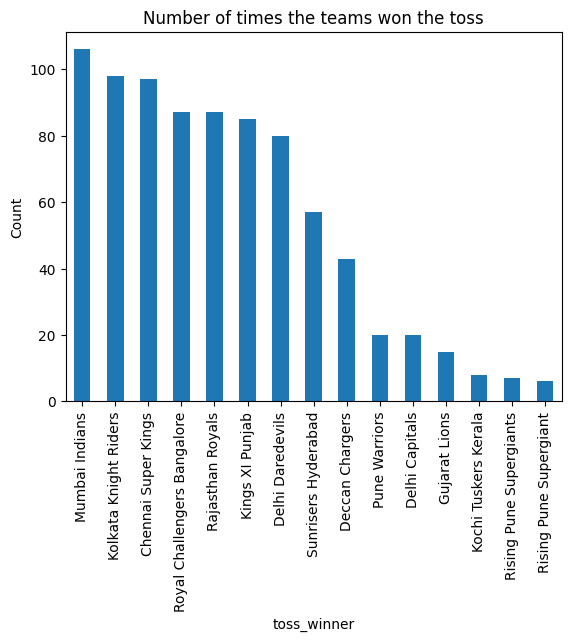

In [ ]:
toss_winner.plot(kind='bar')
plt.title('Number of times the teams won the toss')
plt.xlabel('toss_winner')
plt.ylabel('Count')
plt.show()

**Q 6. What does the team decide after winning the toss?**

Ans: to check the team decision, I used the query functioin for Mumbai Indian in column "toss_winner" and check the corresponding values in column "toss decision". Then I counted the decisions using value_count() code.

In [ ]:
team_decision=df.query("toss_winner=='Mumbai Indians'")['toss_decision'].value_counts()
print(team_decision)

field    58
bat      48
Name: toss_decision, dtype: int64


**Q 8. Does winning the toss imply winning the game?**

Ans: to check this relation, I compare 2 columns "toss_winner" and "winner", and calculated the percentage of matched values.
The result is 51%. Therefore, winning the toss does not always imply winnig the game.

In [ ]:
tosswin_vs_matchwin=df[df['toss_winner']==df['winner']]
percentage_tosswin_vs_matchwin=(len(tosswin_vs_matchwin)/len(df))*100
print(f"{len(tosswin_vs_matchwin)}, {percentage_tosswin_vs_matchwin}%")

418, 51.225490196078425%


**Q 9. How many times has the chasing team won the match?**

Ans: To check this relation, I have used the same approach as that of Q 8 above.


Onlly in 367 matches (aprox 45%), the chasing team won the match.

In [ ]:
chasingteam_winner=df[df['team2']==df['winner']]
percentage_chasingteam_winner=(len(chasingteam_winner)/len(df))*100
print(f"Number of matches where chasing team won: {len(chasingteam_winner)}, Percentage: {percentage_chasingteam_winner}%")

Number of matches where chasing team won: 367, Percentage: 44.97549019607843%


**Q 11. Which team has played the most number of matches?**

Ans: To find the team with maximum matches, I combined the columns "team1" and "team2", and then identify the team with maximum occurrence. I used the below code.

In [ ]:
combined_team1_team2 = pd.concat([df['team1'], df['team2']])
count_team1_team2=combined_team1_team2.value_counts()
team_max_matches=count_team1_team2.idxmax()
print(f"Name of team that played max matches: {team_max_matches}, Number of matches played: {count_team1_team2[team_max_matches]}")

Name of team that played max matches: Mumbai Indians, Number of matches played: 203


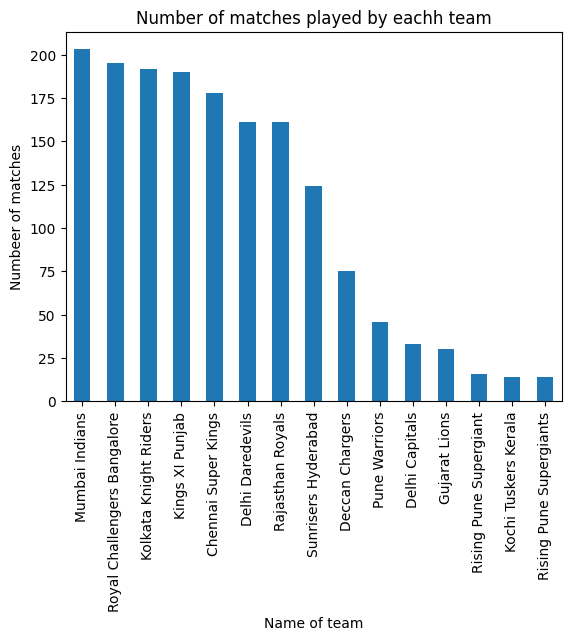

In [ ]:
count_team1_team2.plot(kind='bar')
plt.title('Number of matches played by eachh team')
plt.xlabel('Name of team')
plt.ylabel('Numbeer of matches')
plt.show()

**Q 12. Which team has won the most number of times?**

Ans: The most winning team is Mumbai Indians.

In [ ]:
winner_teams=df["winner"].value_counts()
most_winner=winner_teams.idxmax()
print(f"Most winning team: {most_winner}, Number of matches won: {winner_teams[most_winner]}")

Most winning team: Mumbai Indians, Number of matches won: 120


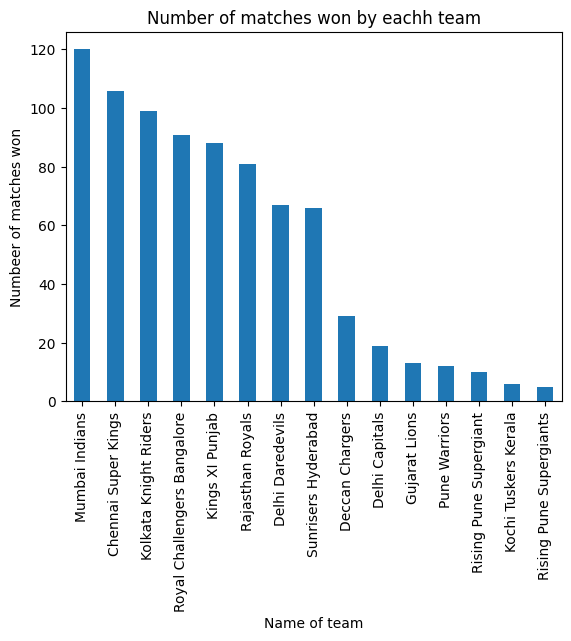

In [ ]:
winner_teams.plot(kind='bar')
plt.title('Number of matches won by eachh team')
plt.xlabel('Name of team')
plt.ylabel('Numbeer of matches won')
plt.show()

Q 7. How does the toss decision vary across seasons?

To solve this query I grouped the toss decision by year.

In [ ]:
TossDecision_season=df.groupby('year')['toss_decision'].value_counts()
print(TossDecision_season)

year  toss_decision
2008  field            32
      bat              26
2009  bat              35
      field            22
2010  bat              39
      field            21
2011  field            48
      bat              25
2012  bat              37
      field            37
2013  bat              45
      field            31
2014  field            41
      bat              19
2015  field            34
      bat              25
2016  field            49
      bat              11
2017  field            48
      bat              11
2018  field            50
      bat              10
2019  field            50
      bat              10
2020  field            33
      bat              27
Name: toss_decision, dtype: int64


Rearange the results

In [ ]:
TossDecision_season2=TossDecision_season.unstack(fill_value=0)
print(TossDecision_season2)

toss_decision  bat  field
year                     
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020            27     33


Plot the results using bar chart

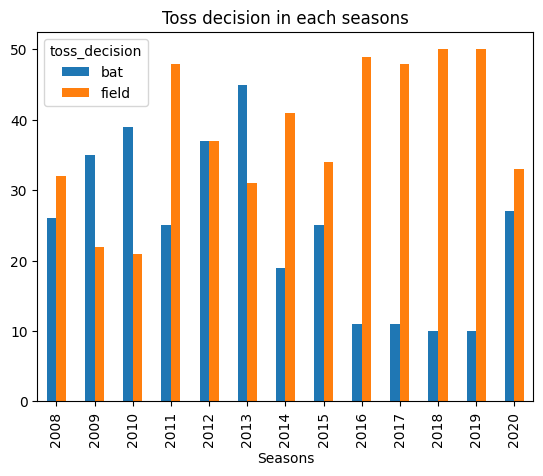

In [ ]:
TossDecision_season2.plot(kind='bar')
plt.title('Toss decision in each seasons')
plt.xlabel('Seasons')
plt.show()

**Q 19. Which is the biggest win in terms of run margin?**

Biggest win in terms of run margin

In [ ]:
big_win_runs=df.query("result=='runs'")['result_margin'].max()
print(big_win_runs)

146.0


Find the teams and winner of this match.

To find this, I extracted the values corresponding to 146 in other columns.

In [ ]:
team_big_win_runs=df[df['result_margin'] == 146][['city','venue','team1','team2','winner']]
print(team_big_win_runs)

      city             venue             team1           team2          winner
620  Delhi  Feroz Shah Kotla  Delhi Daredevils  Mumbai Indians  Mumbai Indians



This macth was played b/w Delhi Daredevils and Mumbai Indians at Delhi (Feroz Shah Kotla stadium) and the winner was Mumbai Indians.

Biggest win in terms of wickets

In [ ]:
win_by_wickets=df.query("result=='wickets'")['result_margin'].value_counts()
print(win_by_wickets)

6.0     88
7.0     84
5.0     79
8.0     62
4.0     42
9.0     39
3.0     18
10.0    14
2.0      6
1.0      3
Name: result_margin, dtype: int64


As we can see from the results, max wickets win was win by 10 wickets. In total 14 matches the team won by 10 wickets.

**Q 26. Which stadium has hosted the most number of matches?**

In [ ]:
stadium_host_max = df['venue'].value_counts().idxmax()
stadium_host_max_matches = df['venue'].value_counts().max()
print(f'Name of stadium: {stadium_host_max}, Number of matches hosted: {stadium_host_max_matches}')

Name of stadium: Eden Gardens, Number of matches hosted: 77


**Q 27. Who has won the most MOM awards?**

Ans. AB de Villiers
MOM in 23 matches.

In [ ]:
MaxMOM_player=df['player_of_match'].value_counts().idxmax()
MOM_count=df['player_of_match'].value_counts().max()
print(MaxMOM_player)
print(MOM_count)

AB de Villiers
23
